# EDA
- Performing EDA on data

### Importing Required Libraries 

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf # To Be used as Keras Backend
import keras # keras framework is used to apply various Techniques

import matplotlib.pyplot as plt # To plot the data


## Reading the data 
- A function ``read_data()`` is defined to read the data and it returns ``list of list`` of tokenas for every sentance and for every tag.
- While importing data if token Starts with ``@`` which corresponds to a user name and if token starts with ``http://`` or ``https://``, corresponds to the URL, i am replacing them with ``<USR>`` and ``<URL>`` repectively.
- function returs the ``tokens`` and ``tags`` which are heaving list of list of tokens and tags.

## How can we import the data i.e. ``train.txt''

## there are multiple ways to mport the dataset to the system.
- 1. I can import the data as ``DataFrame`` using delimiter ``\t`` because file is heaving tab seperated values.
ex: ``df = pd.read_csv('train.txt',delimiter='\t',header=None)``

- 2. I can simpley use ``open()`` method to read the data line by line nad performing data cleaning simultaneously.
ex: ``for line in open(file_path, encoding='utf-8'):``

Here i am using Second method.

In [2]:
def read_data(file_path):
    tokens = [] # List of list of words in a tweet, for all tweets
    tags = [] # List of list of tags in a tweet, for all tags corresponding to the tweet
    
    tweet_tokens = []
    tweet_tags = []
    for line in open(file_path, encoding='utf-8'):  
        line = line.strip() # remove leading and trailing space
        if not line:
            if tweet_tokens:
                tokens.append(tweet_tokens)
                tags.append(tweet_tags)
            tweet_tokens = []
            tweet_tags = []
        else:
            token, tag = line.split()
            if token.startswith("@"):
                token="<USR>" # Replace username with <USR>
            elif token.startswith("http://") or token.startswith("https://"):
                token="<URL>" # Replace links with <URL>
            tweet_tokens.append(token)
            tweet_tags.append(tag)
            
    return tokens, tags

## Importing Required File from Local file into Googal-colab environment.
- using specific function to import or load data into googal-colab memory using ``from google.colab import files``\n
``uploaded = files.upload()``  and upload the file in colab from local environment.

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.txt to test.txt
Saving train.txt to train.txt
User uploaded file "test.txt" with length 129991 bytes
User uploaded file "train.txt" with length 493782 bytes


## Executing ``read_data`` function to get the ``train_tokens`` and ``train_tags``

In [4]:
train_tokens, train_tags = read_data('train.txt')

In [5]:
# To get the length of train 
tt_len = len(train_tokens)
tt_len

3394

In [6]:
tg_len = len(train_tags)
tg_len

3394

The above lengths shows that there are total ``3394 sentances`` in the train.txt corpus.

## Heaving a look at the kind of data we have extracted 

In [7]:
train_tokens

[['<USR>',
  'It',
  "'s",
  'the',
  'view',
  'from',
  'where',
  'I',
  "'m",
  'living',
  'for',
  'two',
  'weeks',
  '.',
  'Empire',
  'State',
  'Building',
  '=',
  'ESB',
  '.',
  'Pretty',
  'bad',
  'storm',
  'here',
  'last',
  'evening',
  '.'],
 ['From',
  'Green',
  'Newsfeed',
  ':',
  'AHFA',
  'extends',
  'deadline',
  'for',
  'Sage',
  'Award',
  'to',
  'Nov',
  '.',
  '5',
  '<URL>'],
 ['Pxleyes',
  'Top',
  '50',
  'Photography',
  'Contest',
  'Pictures',
  'of',
  'August',
  '2010',
  '...',
  '<URL>',
  '#photography'],
 ['today', 'is', 'my', 'last', 'day', 'at', 'the', 'office', '.'],
 ['4Dbling',
  "'s",
  'place',
  'til',
  'monday',
  ',',
  'party',
  'party',
  'party',
  '.',
  '&lt;',
  '3'],
 ['watching',
  'the',
  'VMA',
  'pre-show',
  'again',
  'lol',
  'it',
  'was',
  "n't",
  'even',
  'a',
  'good',
  'show',
  'the',
  'first',
  'time',
  '...',
  'so',
  'bored',
  '!'],
 ['27',
  'followers',
  '!',
  '30',
  'followers',
  'is',
 

In [8]:
train_tokens[5] # This Represents the tokens of the Sentance 5 i.e. 5th sentance

['watching',
 'the',
 'VMA',
 'pre-show',
 'again',
 'lol',
 'it',
 'was',
 "n't",
 'even',
 'a',
 'good',
 'show',
 'the',
 'first',
 'time',
 '...',
 'so',
 'bored',
 '!']

In [9]:
train_tags

[['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-location',
  'I-location',
  'I-location',
  'O',
  'B-location',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'B-group',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['B-corporation', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-person', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'B-creative-work',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

## Exploring the data
- We are joining the tokens of a sentance and making the complete sentence
- making the full sentence of first sentence from tokens
- ``<USR>`` Represents the User name that does't add any sepcific or relevent information to our calculation.


In [10]:
# Exploring the data

for word in train_tokens[0]:
    print(word, end=" ")

<USR> It 's the view from where I 'm living for two weeks . Empire State Building = ESB . Pretty bad storm here last evening . 

Similarly we are adding all the tokens of the first sentance token by token.

In [11]:
for tag in train_tags[0]: 
    print(tag, end=" ")

O O O O O O O O O O O O O O B-location I-location I-location O B-location O O O O O O O O 

## Making Sentences:
- Here we are making the sentances which are stored in tuple form i.e. every token is added with their corresponding tag.

In [12]:
sentences =[]
for i in range(len(train_tokens)):
    pc = [(w,p) for w,p in zip(train_tokens[i],train_tags[i])]
    sentences.append(pc)

In [13]:
# Exploring the sentences which we have just made
sentences[1]

[('From', 'O'),
 ('Green', 'O'),
 ('Newsfeed', 'O'),
 (':', 'O'),
 ('AHFA', 'B-group'),
 ('extends', 'O'),
 ('deadline', 'O'),
 ('for', 'O'),
 ('Sage', 'O'),
 ('Award', 'O'),
 ('to', 'O'),
 ('Nov', 'O'),
 ('.', 'O'),
 ('5', 'O'),
 ('<URL>', 'O')]

## Here we are calculating the maxmum length of sentances.
## why this is required?
- Once we know the length of the maximum length sentence
- we will make the all the arrays of the same length so that we can fit the data into algorithm
- ``maxlen`` will give the maximum length

In [14]:
# For knowing the maximum length of a sentance 


maxlen = max([len(s) for s in train_tokens]) # This gives the maximum length
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 41


## Plotting the Length of all the sdentences
- here now we are using matplotlib to plot all the maximum sentences length in graph

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

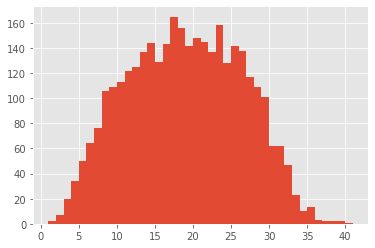

In [16]:
plt.hist([len(s) for s in sentences], bins=40)
plt.show()

## Making the dictonary:
- here we are making the dictonaries which consist of:
  - for tokens in this we have all the unique tokens and their index values as the value of the key for thet token
  - for tag also we are doing the same 
- Defining the function ``built_dict()`` which takes the list of list of tokens or  list of list of tags and special tokens which we have definded for both the tokens and tags.
- this function returns ``token2idx`` which has key valur pair of token and corresponding index value.
- this also returns ``tag2idx`` which returns the total unique tags with their correspong index value as the key value pair.


In [17]:
from collections import defaultdict

def build_dict(tokens_or_tags, special_tokens):
#     tokens_or_tags is list of list of tokens/tags
#     special_tokens are some special tokens
    # Create a dict with default value 0
    tok2idx = defaultdict(lambda: 0) # defining initial value as zero
    idx2tok = []
    k = 0
    
    for line in special_tokens: # iterating through the list of list of special_tokens/tags
        tok2idx[line] = k
        k += 1
        idx2tok.append(line)
        
    for tokens in tokens_or_tags: # iterating through the list of list of tokens/tags
        for token in tokens:
            if token not in tok2idx:
                tok2idx[token] = k
                k += 1
                idx2tok.append(token)
    return tok2idx, idx2tok

## Defining the list of sepcial tokens
- special tokens are heaving two value that are unk and Pad
- special tag is 'O' because it doesn't add any value to our calculation.

In [18]:
special_tokens = ['<UNK>', '<PAD>']
special_tags = ['O']

In [19]:
# Create the Dictionaries
token2idx, idx2token = build_dict(train_tokens, special_tokens) # for tokens
tag2idx, idx2tag = build_dict(train_tags, special_tags) # for tags

## Calculating Total Numbers of the unique tokens available in the train.text corpus

In [20]:
n_words = len(token2idx)
n_words

12219

Exploring how token2idex looks like to get a fair idea

In [21]:
token2idx

defaultdict(<function __main__.build_dict.<locals>.<lambda>>,
            {'<UNK>': 0,
             '<PAD>': 1,
             '<USR>': 2,
             'It': 3,
             "'s": 4,
             'the': 5,
             'view': 6,
             'from': 7,
             'where': 8,
             'I': 9,
             "'m": 10,
             'living': 11,
             'for': 12,
             'two': 13,
             'weeks': 14,
             '.': 15,
             'Empire': 16,
             'State': 17,
             'Building': 18,
             '=': 19,
             'ESB': 20,
             'Pretty': 21,
             'bad': 22,
             'storm': 23,
             'here': 24,
             'last': 25,
             'evening': 26,
             'From': 27,
             'Green': 28,
             'Newsfeed': 29,
             ':': 30,
             'AHFA': 31,
             'extends': 32,
             'deadline': 33,
             'Sage': 34,
             'Award': 35,
             'to': 36,
             'N

Getting total number of unique tags-
with us=nique tag also

In [22]:
n_tags = len(tag2idx)
n_tags

13

In [23]:
tag2idx

defaultdict(<function __main__.build_dict.<locals>.<lambda>>,
            {'B-corporation': 4,
             'B-creative-work': 6,
             'B-group': 3,
             'B-location': 1,
             'B-person': 5,
             'B-product': 7,
             'I-corporation': 10,
             'I-creative-work': 9,
             'I-group': 11,
             'I-location': 2,
             'I-person': 8,
             'I-product': 12,
             'O': 0})

From above we can see that special tag 'O' has been given the value as 0

## Getting only unique tokenas as list.
- here i have extracted only tokens a list

In [24]:
unique_token_list = [] 
for key in token2idx.keys(): 
    unique_token_list.append(key)

In [25]:
unique_token_list

['<UNK>',
 '<PAD>',
 '<USR>',
 'It',
 "'s",
 'the',
 'view',
 'from',
 'where',
 'I',
 "'m",
 'living',
 'for',
 'two',
 'weeks',
 '.',
 'Empire',
 'State',
 'Building',
 '=',
 'ESB',
 'Pretty',
 'bad',
 'storm',
 'here',
 'last',
 'evening',
 'From',
 'Green',
 'Newsfeed',
 ':',
 'AHFA',
 'extends',
 'deadline',
 'Sage',
 'Award',
 'to',
 'Nov',
 '5',
 '<URL>',
 'Pxleyes',
 'Top',
 '50',
 'Photography',
 'Contest',
 'Pictures',
 'of',
 'August',
 '2010',
 '...',
 '#photography',
 'today',
 'is',
 'my',
 'day',
 'at',
 'office',
 '4Dbling',
 'place',
 'til',
 'monday',
 ',',
 'party',
 '&lt;',
 '3',
 'watching',
 'VMA',
 'pre-show',
 'again',
 'lol',
 'it',
 'was',
 "n't",
 'even',
 'a',
 'good',
 'show',
 'first',
 'time',
 'so',
 'bored',
 '!',
 '27',
 'followers',
 '30',
 'goal',
 'This',
 '2nd',
 'hospital',
 'ive',
 'been',
 'in',
 'but',
 'just',
 'seen',
 'doctor',
 'who',
 'an',
 'older',
 'version',
 'justin',
 ":'",
 ')',
 'Friday',
 'Night',
 'Eats',
 'Gotta',
 'dress',
 'up

## Getting only unique tag as list.
- here i have extracted only tags as  a list

In [26]:
unique_tag_list = [] 
for key in tag2idx.keys(): 
    unique_tag_list.append(key)

In [27]:
unique_tag_list

['O',
 'B-location',
 'I-location',
 'B-group',
 'B-corporation',
 'B-person',
 'B-creative-work',
 'B-product',
 'I-person',
 'I-creative-work',
 'I-corporation',
 'I-group',
 'I-product']

In [28]:
tf.__version__ # To check in which tensorflow version i am working on 

'2.3.0'

In [29]:
keras.__version__ # To check in which keras version i am working on 

'2.4.3'

# Preparing Data for Feeding into Algorithms.

## Importing Required Libraries from keras 

In [30]:
from keras.preprocessing.sequence import pad_sequences # For the Padding of the text

## Getting the all the tokens corresponding index value as a matrix

In [31]:
X = [[token2idx[w[0]] for w in s] for s in sentences] # Storing as X

## Performing padding:
- Padding is done to get the all the matxix of same length whic is of maximum length 41.

In [32]:
X = pad_sequences(maxlen=41, sequences=X, padding="post",value=n_words - 1)

In [33]:
X

array([[    2,     3,     4, ..., 12218, 12218, 12218],
       [   27,    28,    29, ..., 12218, 12218, 12218],
       [   40,    41,    42, ..., 12218, 12218, 12218],
       ...,
       [ 4672,   197,   217, ..., 12218, 12218, 12218],
       [12213,  2063,   332, ..., 12218, 12218, 12218],
       [ 1373,  1474,   557, ..., 12218, 12218, 12218]], dtype=int32)

In [34]:
print(len(X))
print(len(X[0]))

3394
41


## Defining Y parameter

In [35]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]

In [36]:
y = pad_sequences(maxlen=41, sequences=y, padding="post", value=tag2idx["O"])

## Importing important libraries

In [37]:
from keras.utils import to_categorical # to get the catagorical values for the corresponding value


y = [to_categorical(i, num_classes=n_tags) for i in y]

In [38]:
y

[array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        

In [39]:
from sklearn.model_selection import train_test_split # To split the data into train and  test set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Models Used for NER

## Using LSTM:
- We can't Use any LSTM Model in NER.


- ***We need to use ```bi-directional LSTMs```` because using a standard LSTM to make predictions will only take the “past” information in a sequence of the text into account. for NER, since the context covers past and future labels in a sequence, we need to take both the past and the future information into account.***

In [40]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [41]:
input = Input(shape=(maxlen,))
model = Embedding(input_dim=n_words, output_dim=maxlen, input_length=maxlen)(input)
model = Dropout(0.2)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
model = Dropout(0.2)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
model = Dropout(0.5)(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer

In [42]:
model = Model(input, out)

In [43]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [44]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 41)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 41, 41)            500979    
_________________________________________________________________
dropout (Dropout)            (None, 41, 41)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 41, 200)           113600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 41, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 41, 200)           240800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 41, 200)          

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [46]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=2,verbose = 1, mode ='max',restore_best_weights = True)
callbacks = early_stopping
history = model.fit( X_train,np.array(y_train), validation_split = 0.2, batch_size = 32,epochs = 20, verbose =1,callbacks=callbacks)

Epoch 1/20
68/68 [==============================] - 35s 512ms/step - loss: 0.4140 - accuracy: 0.9645 - val_loss: 0.1525 - val_accuracy: 0.9769
Epoch 2/20
68/68 [==============================] - 34s 496ms/step - loss: 0.1501 - accuracy: 0.9781 - val_loss: 0.1495 - val_accuracy: 0.9769
Epoch 3/20
68/68 [==============================] - 33s 480ms/step - loss: 0.1426 - accuracy: 0.9781 - val_loss: 0.1438 - val_accuracy: 0.9769
Epoch 00003: early stopping


Evaluate the Model


In [47]:
model.evaluate(X_test,np.array(y_test))

22/22 [==============================] - 1s 43ms/step - loss: 0.1627 - accuracy: 0.9751


[0.16270019114017487, 0.9751068353652954]

## SO untill here Getiing the accuracy of ```0.9751```

Text(0.5, 1.0, 'Accuracy Curves')

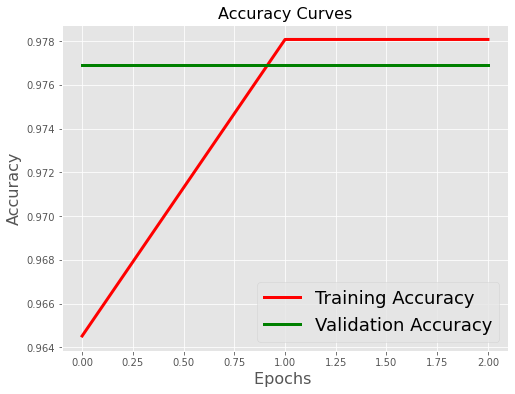

In [48]:
# Plotting The Accuracy

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'g',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

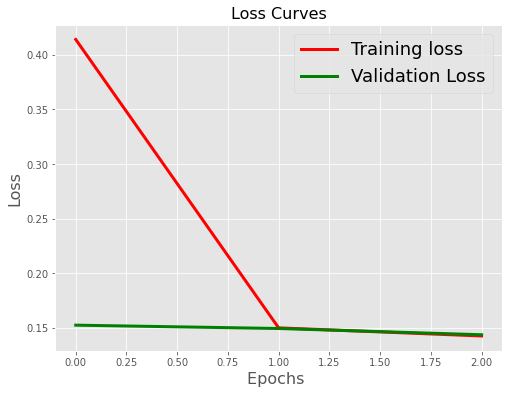

In [49]:
# Plot the loss

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'g',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [50]:
# Testing



i = np.random.randint(0,X_test.shape[0])
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis =-1)
y_true = np.argmax(np.array(y_test), axis =-1)[i]
print("{:15}{:5}\t {} \n".format("Word","True","Pred"))
print("-"*30)
for w,true,pred in zip(X_test[i],y_true,p[0]):
    print("{:15}{}\t{}".format(unique_token_list[w-1],unique_tag_list[true],
                               unique_tag_list[pred]))

Word           True 	 Pred 

------------------------------
Job            O	O
perform        B-location	O
#KansasCity    O	O
Home           O	O
Area           O	O
4              O	O
Director       O	O
months         O	O
Publisher      O	O
Newsfeed       O	O
950)           B-location	O
In             I-location	O
monday         O	O
splendidly     O	O
's             O	O
Read           O	O
MO-Kansas      O	O
2-6            O	O
loop           O	O
2010           O	O
5              O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O
GMT+0000       O	O


In [51]:
predictions = model.predict(np.array(X_test))
predictions = np.argmax(predictions, axis=-1)

In [52]:
predictions.shape

(679, 41)

In [53]:
y_test_arr = np.array(y_test)
y_test_result=np.argmax(y_test_arr, axis=-1)
y_test_result.shape

(679, 41)

In [54]:
y_test_result[0]

array([ 3,  0,  3, 11,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

In [55]:
predictions[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## So on the Test data we are getting the accuracy of 97.51% .


# Further Fine tuning of the model can be done as per the domain requirement.

# Further BERT can also be used for NER